In [2]:
import pandas as pd

# 1 - Faça a leitura do Dataset exercicio_1.csv

In [3]:
#Utilize o parâmetro sep=";" para leitura do Dataset
df = pd.read_csv('./exercicio_1.csv', sep=';')
df.head()

,id_venda,nome_produto,vendas,custo,preco
0,1,Lindt,150,5.0,8.0
1,2,Cadbury,200,3.0,6.0
2,3,Hershey's,180,4.0,7.0
3,4,Lindt,120,5.0,8.0
4,5,Cadbury,170,3.0,6.0


## 2 - Crie uma nova coluna com o nome df["margem_lucro"] com o cálculo: margem_lucro = preco - custo

In [4]:
df = pd.read_csv('exercicio_1.csv', sep=';')

# Adicionando uma nova coluna chamada 'nova_coluna' com valores padrão (por exemplo, 0)
df['nova_coluna'] = 0

# Exibindo as primeiras linhas do DataFrame com a nova coluna
print(df.head())



   id_venda nome_produto  vendas  custo  preco  nova_coluna
0         1        Lindt     150    5.0    8.0            0
1         2      Cadbury     200    3.0    6.0            0
2         3    Hershey's     180    4.0    7.0            0
3         4        Lindt     120    5.0    8.0            0
4         5      Cadbury     170    3.0    6.0            0


## 3 - Filtre as vendas para uma marca específica. Escolha a marca Lindt e exiba todas as suas vendas.

In [5]:
import pandas as pd

# Leitura do arquivo CSV
df = pd.read_csv('exercicio_1.csv', sep=';')

# Exibir as primeiras linhas para verificar as colunas
print(df.head())

# Supondo que a coluna que contém a marca seja chamada 'marca'
# Filtrar as vendas para a marca 'Lindt'
df_lindt = df[df['nome_produto'] == 'Lindt']

# Exibir todas as vendas para a marca 'Lindt'
print(df_lindt)


   id_venda nome_produto  vendas  custo  preco
0         1        Lindt     150    5.0    8.0
1         2      Cadbury     200    3.0    6.0
2         3    Hershey's     180    4.0    7.0
3         4        Lindt     120    5.0    8.0
4         5      Cadbury     170    3.0    6.0
   id_venda nome_produto  vendas  custo  preco
0         1        Lindt     150    5.0    8.0
3         4        Lindt     120    5.0    8.0



## 4 - Qual a soma de vendas do produto 'Cadbury' ?

In [6]:
df = pd.read_csv('exercicio_1.csv', sep=';')
print(df.head())
df_cadbury = df[df['nome_produto'] == 'Cadbury']
soma_vendas_cadbury = df_cadbury['vendas'].sum()
print(f"Soma das vendas do produto 'Cadbury': {soma_vendas_cadbury}")

   id_venda nome_produto  vendas  custo  preco
0         1        Lindt     150    5.0    8.0
1         2      Cadbury     200    3.0    6.0
2         3    Hershey's     180    4.0    7.0
3         4        Lindt     120    5.0    8.0
4         5      Cadbury     170    3.0    6.0
Soma das vendas do produto 'Cadbury': 370


## 5 - (Extra) Ordene o dataset com a soma da coluna de vendas por produto?
Dica: Realizar agrupamento por produto realizando a soma da coluna vendas, por fim ordenar pelo novo valor da soma final.


In [7]:
# Leitura do arquivo CSV
df = pd.read_csv('exercicio_1.csv', sep=';')

# Exibir as primeiras linhas para verificar as colunas
print(df.head())

# Agrupar por produto e calcular a soma das vendas
df_agrupado = df.groupby('nome_produto')['vendas'].sum().reset_index()

# Ordenar pelo valor da soma das vendas em ordem decrescente
df_ordenado = df_agrupado.sort_values(by='vendas', ascending=False)

# Exibir o DataFrame ordenado
print(df_ordenado)

   id_venda nome_produto  vendas  custo  preco
0         1        Lindt     150    5.0    8.0
1         2      Cadbury     200    3.0    6.0
2         3    Hershey's     180    4.0    7.0
3         4        Lindt     120    5.0    8.0
4         5      Cadbury     170    3.0    6.0
  nome_produto  vendas
0      Cadbury     370
1    Hershey's     370
2        Lindt     270


In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

[1] "DataFrame original:"
  id_venda nome_produto vendas custo preco
1        1        Lindt    150     5     8
2        2      Cadbury    200     3     6
3        3    Hershey's    180     4     7
4        4        Lindt    120     5     8
5        5      Cadbury    170     3     6
6        6    Hershey's    190     4     7


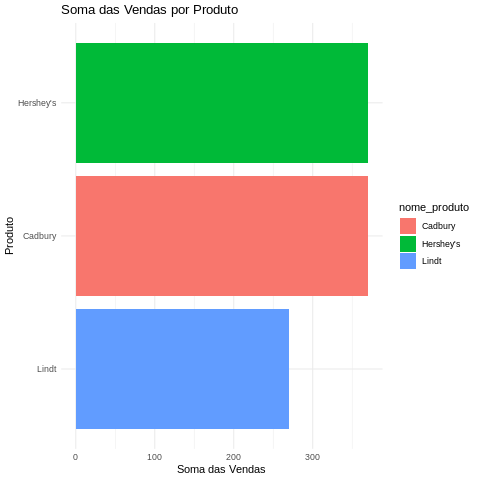

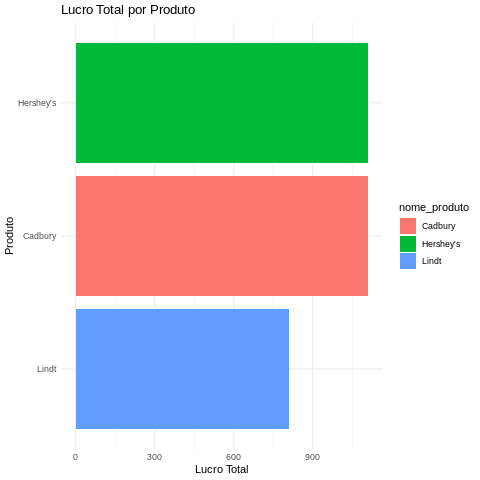

In [ ]:
%%R
# Carregar as bibliotecas necessárias
library(dplyr)
library(ggplot2)

# Criar o DataFrame com os dados fornecidos
dados <- data.frame(
  id_venda = c(1, 2, 3, 4, 5, 6),
  nome_produto = c("Lindt", "Cadbury", "Hershey's", "Lindt", "Cadbury", "Hershey's"),
  vendas = c(150, 200, 180, 120, 170, 190),
  custo = c(5, 3, 4, 5, 3, 4),
  preco = c(8, 6, 7, 8, 6, 7)
)

# Mostrar o DataFrame
print("DataFrame original:")
print(dados)

# Calcular a soma das vendas por produto
soma_vendas <- dados %>%
  group_by(nome_produto) %>%
  summarise(soma_vendas = sum(vendas))

# Calcular o lucro total por produto
dados <- dados %>%
  mutate(lucro_unitario = preco - custo,
         lucro_total = vendas * lucro_unitario)

lucro_total <- dados %>%
  group_by(nome_produto) %>%
  summarise(lucro_total = sum(lucro_total))

# Criar gráficos
# Gráfico de soma das vendas por produto
grafico_vendas <- ggplot(soma_vendas, aes(x = reorder(nome_produto, soma_vendas), y = soma_vendas, fill = nome_produto)) +
  geom_bar(stat = "identity") +
  labs(title = "Soma das Vendas por Produto", x = "Produto", y = "Soma das Vendas") +
  theme_minimal() +
  coord_flip()

# Gráfico de lucro total por produto
grafico_lucro <- ggplot(lucro_total, aes(x = reorder(nome_produto, lucro_total), y = lucro_total, fill = nome_produto)) +
  geom_bar(stat = "identity") +
  labs(title = "Lucro Total por Produto", x = "Produto", y = "Lucro Total") +
  theme_minimal() +
  coord_flip()

# Exibir os gráficos
print(grafico_vendas)
print(grafico_lucro)
